In [63]:
import pandas as pd
import numpy as np
import scipy as stats
import seaborn as sns

In [64]:
data = pd.read_csv("./agtuary-ml/pixels.csv").drop(columns='B04')
data

,B01,B02,B03,B05,B06,B07,B08,B8A,B09,B11,B12,label_id,cloud_prob,label
0,0.0724,0.0984,0.1148,0.1523,0.1629,0.1765,0.1998,0.1959,0.2011,0.3177,0.2703,1,0.0,Sorghum
1,0.0752,0.0954,0.1172,0.1560,0.1656,0.1809,0.2018,0.1996,0.2066,0.3224,0.2757,1,0.0,Sorghum
2,0.0752,0.0932,0.1142,0.1560,0.1656,0.1809,0.1952,0.1996,0.2066,0.3224,0.2757,1,0.0,Sorghum
3,0.0752,0.0962,0.1178,0.1560,0.1656,0.1809,0.2004,0.1996,0.2066,0.3224,0.2757,1,0.0,Sorghum
4,0.0752,0.0928,0.1136,0.1560,0.1656,0.1809,0.1932,0.1996,0.2066,0.3224,0.2757,1,0.0,Sorghum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299889,0.0529,0.0705,0.0821,0.1106,0.1124,0.1202,0.1316,0.1361,0.1393,0.2498,0.2290,0,0.0,Other
299890,0.0529,0.0716,0.0813,0.1106,0.1124,0.1202,0.1316,0.1361,0.1393,0.2498,0.2290,0,0.0,Other
299891,0.0529,0.0712,0.0852,0.1136,0.1167,0.1255,0.1344,0.1413,0.1393,0.2514,0.2299,0,0.0,Other
299892,0.0529,0.0735,0.0869,0.1136,0.1167,0.1255,0.1372,0.1413,0.1393,0.2514,0.2299,0,0.0,Other


### Preparing data
    -   Remove any pixels that have a cloud probability of over 2
    -   Visualise value
    -   Remove potential outliers/nose

In [65]:
# Using a boolean mask
cond = data['cloud_prob'].le(2)
out = data[cond]
out

,B01,B02,B03,B05,B06,B07,B08,B8A,B09,B11,B12,label_id,cloud_prob,label
0,0.0724,0.0984,0.1148,0.1523,0.1629,0.1765,0.1998,0.1959,0.2011,0.3177,0.2703,1,0.0,Sorghum
1,0.0752,0.0954,0.1172,0.1560,0.1656,0.1809,0.2018,0.1996,0.2066,0.3224,0.2757,1,0.0,Sorghum
2,0.0752,0.0932,0.1142,0.1560,0.1656,0.1809,0.1952,0.1996,0.2066,0.3224,0.2757,1,0.0,Sorghum
3,0.0752,0.0962,0.1178,0.1560,0.1656,0.1809,0.2004,0.1996,0.2066,0.3224,0.2757,1,0.0,Sorghum
4,0.0752,0.0928,0.1136,0.1560,0.1656,0.1809,0.1932,0.1996,0.2066,0.3224,0.2757,1,0.0,Sorghum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299889,0.0529,0.0705,0.0821,0.1106,0.1124,0.1202,0.1316,0.1361,0.1393,0.2498,0.2290,0,0.0,Other
299890,0.0529,0.0716,0.0813,0.1106,0.1124,0.1202,0.1316,0.1361,0.1393,0.2498,0.2290,0,0.0,Other
299891,0.0529,0.0712,0.0852,0.1136,0.1167,0.1255,0.1344,0.1413,0.1393,0.2514,0.2299,0,0.0,Other
299892,0.0529,0.0735,0.0869,0.1136,0.1167,0.1255,0.1372,0.1413,0.1393,0.2514,0.2299,0,0.0,Other


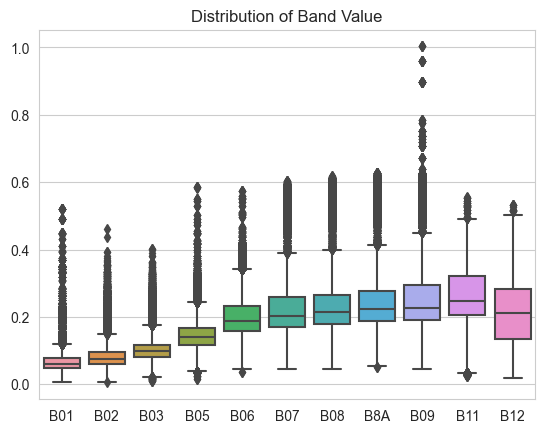

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")  # set background style
sns.set_palette("flare")  # set color palette
band_columns = out.columns[:11]
sns.boxplot(data = out[band_columns])
plt.title('Distribution of Band Value')
plt.show()

In [75]:
data_arr = data[band_columns].to_numpy()
print(data_arr)
# normalising data
new_data = data_arr/1.0027

[[0.0724 0.0984 0.1148 ... 0.2011 0.3177 0.2703]
 [0.0752 0.0954 0.1172 ... 0.2066 0.3224 0.2757]
 [0.0752 0.0932 0.1142 ... 0.2066 0.3224 0.2757]
 ...
 [0.0529 0.0712 0.0852 ... 0.1393 0.2514 0.2299]
 [0.0529 0.0735 0.0869 ... 0.1393 0.2514 0.2299]
 [0.0561 0.0716 0.0869 ... 0.1507 0.2606 0.2386]]


In [80]:
data.loc[:, band_columns] = new_data
data

,B01,B02,B03,B05,B06,B07,B08,B8A,B09,B11,B12,label_id,cloud_prob,label
0,0.072205,0.098135,0.114491,0.151890,0.162461,0.176025,0.199262,0.195372,0.200558,0.316845,0.269572,1,0.0,Sorghum
1,0.074998,0.095143,0.116884,0.155580,0.165154,0.180413,0.201257,0.199063,0.206044,0.321532,0.274958,1,0.0,Sorghum
2,0.074998,0.092949,0.113892,0.155580,0.165154,0.180413,0.194674,0.199063,0.206044,0.321532,0.274958,1,0.0,Sorghum
3,0.074998,0.095941,0.117483,0.155580,0.165154,0.180413,0.199860,0.199063,0.206044,0.321532,0.274958,1,0.0,Sorghum
4,0.074998,0.092550,0.113294,0.155580,0.165154,0.180413,0.192680,0.199063,0.206044,0.321532,0.274958,1,0.0,Sorghum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299889,0.052758,0.070310,0.081879,0.110302,0.112097,0.119876,0.131246,0.135734,0.138925,0.249127,0.228383,0,0.0,Other
299890,0.052758,0.071407,0.081081,0.110302,0.112097,0.119876,0.131246,0.135734,0.138925,0.249127,0.228383,0,0.0,Other
299891,0.052758,0.071008,0.084971,0.113294,0.116386,0.125162,0.134038,0.140920,0.138925,0.250723,0.229281,0,0.0,Other
299892,0.052758,0.073302,0.086666,0.113294,0.116386,0.125162,0.136831,0.140920,0.138925,0.250723,0.229281,0,0.0,Other


In [81]:
print(max(data['B09']))

1.0


In [84]:
from sklearn.model_selection import train_test_split

# Splitting into features and labels
X = data.iloc[:, :-2]  # Selecting all columns except 'cloud_prob' and 'label'
y = data['label_id']

# Splitting into training and test sets with 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

## Using CNN
    - one dimensional CNN since image data converted into tabular
    - Sequential model for image classification
    
### Layers
1. Convolution
2. Maxpooling
3. Dropout
4. Flatten
5. Dense

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
import cv2

In [5]:
model = Sequential()

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-05-15 13:01:49.958412: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-15 13:01:49.958985: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [90]:
im = cv2.imread('agtuary-ml/B02.tif')
print(type(im))
print(im.shape)

<class 'numpy.ndarray'>
(4000, 4000, 3)


#### 1. Convolution layer
- extract features in data using filters, computing dot product and stored into transfer map